## Practicing Neural Networks with the fashion MNIST dataset
---------------------------------

### Loading the fashion MNIST data 
The data can be loaded directly from keras (`keras.datasets.fashion_mnist`).

```python
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

-------------------
### Data Exploration

- **Task 1:** Explore the pictures and labels. 
    - Try displaying a picture of each class in jupyter.
    
    
- **Task 2:** Normalize the data to be between 0 and 1. 
    - Write down in a new markdown cell, **why** should we do this?

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
import matplotlib.pyplot as plt

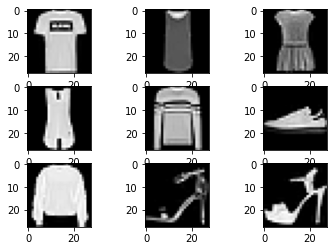

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(train_images[i],cmap = plt.get_cmap('gray'))

In [26]:
train_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078432, 0.7372549 , 0.40392157, 0.21176471, 0.1882353 ,
        0.16862746, 0.34117648, 0.65882355, 0.52156866, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215687, 0.53333336, 0.85882354,
        0.84705883, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.8509804 , 0.84313726, 0.99607843,
        0.90588236, 0.627451  , 0.1764706 , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.6901961 , 0.87058824, 0.8784314 , 0.83137256,
        0.79607844, 0.7764706 , 0.76862746, 0.78431374, 0.84313726,
        0.8       , 0.7921

In [8]:
"""Normalise the data as the pixel values range between 0 and 255 and by normalising it will allow the convergence to be faster and training as well"""

'Normalise the data as the pixel values range between 0 and 255 and by normalising it will allow the convergence to be faster and training as well'

In [9]:
#function to normalise the data

def normalise(x):
    pixel_to_float = x.astype('float32')
    return pixel_to_float/255
    

In [10]:
#normalise all the data
train_images = normalise(train_images)
test_images = normalise(test_images)

----------------------
### Training NN model 

Step 1  -  Build the architecture

Step 2  -  Compile the model 

Step 3  -  Train the model

Step 4  -  Evaluate the model 

#### Step 1 - Build the architecture

In [11]:
network = models.Sequential()

In [12]:
#transform 2d array into 1d array for reshaping
network.add(layers.Flatten(input_shape = (28, 28, 1)))

In [18]:
#add hidden layer 
network.add(layers.Dense(560, activation='relu'))

In [19]:
#add output layer
network.add(layers.Dense(10, activation='softmax'))

#### Step 2 - Compile the model

In [20]:
network.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Step 3 - Train the model

In [21]:
#converting train_labels and test_labels to categorical (not required for )
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [23]:
#train the model
network.fit(train_images, train_labels, epochs=20, batch_size = 32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1847 - accuracy: 0.9349
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1852 - accuracy: 0.9347
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1710 - accuracy: 0.9403
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1736 - accuracy: 0.9388
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1673 - accuracy: 0.9403
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1657 - accuracy: 0.9411
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1619 - accuracy: 0.9429
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1553 - accuracy: 0.9449
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1570 - accuracy: 0.9446
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.153

#### Step 4 - Evaluate the model

In [25]:
#evaluate the data
test_loss, test_accuracy = network.evaluate(test_images, test_labels)
print('test_acc:', test_accuracy, 'test_loss', test_loss)


313/313 [==============================] - 0s 947us/step - loss: 0.3990 - accuracy: 0.8890
test_acc: 0.8889999985694885 test_loss 0.3990376591682434
